<h1 align="center">Heart Disease Diagnostics Analysis</h1>
<img src="image_notebook.jpg" width=1000 height=200 />


## Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Importing the data

In [2]:
df=pd.read_csv('Data\heart_disease_dataset.csv')
df.head() #top five

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

   ca  thal  num  
0   0     6    0  
1   3     3    1  
2   2     7    1  
3   0     3    0  
4   0     3    0

In [3]:
df.tail() #bottom five

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
298   45    1   1       110   264    0        0      132      0      1.2   
299   68    1   4       144   193    1        0      141      0      3.4   
300   57    1   4       130   131    0        0      115      1      1.2   
301   57    0   2       130   236    0        2      174      0      0.0   
302   38    1   3       138   175    0        0      173      0      0.0   

     slope      ca  thal  num  
298      2       0     7    1  
299      2       2     7    1  
300      2       1     7    1  
301      2       1     3    1  
302      1 -100000     3    0

In [4]:
#Checking Not null values
df.info()

# We can see that majority of the variables are of int64 type and are non-null.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  num       303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


##### There are 14 features in Dataset

1) age: The person's age in years

2) sex: The person's sex (1 = male, 0 = female)

3) cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4:          asymptomatic)

4) trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)

5) chol: The person's cholesterol measurement in mg/dl

6) fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

7) restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or        definite left ventricular hypertrophy by Estes' criteria)

8) thalach: The person's maximum heart rate achieved

9) exang: Exercise induced angina (1 = yes; 0 = no)

10) oldpeak: ST depression induced by exercise relative to rest

11)slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

12)ca: The number of major vessels (0-3)

13)thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

14)num: Heart disease (0 = no, 1 = yes)

In [5]:
# On closer analysis of the dataset it is visible that there are some attributes which are classified as int64
# but they are categorical variables having a specific number of classes. Eg. sex, cp, slope etc.

In [6]:
df.shape

# The dataset contains 303 records and 14 different attributes / variables

(303, 14)

In [7]:
df.describe()

# The describe() function gives the statistical summary of the numberical columns of the dataset.

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope  \
count  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.990099  149.607261    0.326733    1.039604    1.600660   
std      0.994971   22.875003    0.469794    1.161075    0.616226   
min      0.000000   71.000000    0.000000    0.000000    1.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000   
50%      1.000000  153.000000    0.000000    0.800000    2.000000   
75%      2.000000  166.000000    1.000000    1.600000    2.000000   
max      2.000000  202.000000    1.000000    6.200000    3.000000   

                  ca           thal         num  
count     303.000000     303.000000  303.000000  
mean    -1319.468647    -655.363036    0.458746  
std     11432.566205    8111.366638    0.499120  
min   -100000.000000 -100000.000000    0.000000  
25%         0.000000       3.000000    0.000000  
50%         0.000000       3.000000    0.000000  
75%         1.000000       7.000000    1.000000  
max         3.000000       7.000000    1.000000

# Percentage of people having Heart Disease


In [8]:
df['num'].value_counts() #balanced data 1---Presence 0 ---Absence of disease

0    164
1    139
Name: num, dtype: int64

In [9]:
def heart_d(r):
    if r==0:
        return 'Absence'
    elif r==1:
        return 'Presence'

In [10]:
#Applying converted data into our dataset with new column - Heart_Disease

df['Heart_Disease']=df['num'].apply(heart_d)
df.drop('num',axis = 1 ,inplace = True)
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

   ca  thal Heart_Disease  
0   0     6       Absence  
1   3     3      Presence  
2   2     7      Presence  
3   0     3       Absence  
4   0     3       Absence

In [11]:
df['Heart_Disease'].value_counts()

Absence     164
Presence    139
Name: Heart_Disease, dtype: int64

In [12]:
#Converting Numerical Data into Categorical Data

def gen(r):
    if r==1:
        return 'Male'
    elif r==0:
        return 'Female'

In [13]:
#Applying converted data into our dataset with new column - sex1

df['sex_category']=df['sex'].apply(gen)
df.drop('sex',axis = 1,inplace = True)
df.head()

age  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  ca  \
0   63   1       145   233    1        2      150      0      2.3      3   0   
1   67   4       160   286    0        2      108      1      1.5      2   3   
2   67   4       120   229    0        2      129      1      2.6      2   2   
3   37   3       130   250    0        0      187      0      3.5      3   0   
4   41   2       130   204    0        2      172      0      1.4      1   0   

   thal Heart_Disease sex_category  
0     6       Absence         Male  
1     3      Presence         Male  
2     7      Presence         Male  
3     3       Absence         Male  
4     3       Absence       Female

In [14]:
#Converting Numerical Data into Categorical Data

def age_rng(r):
    if r>=25 and r<40:
        return 'Young Age'
    elif r>=40 and r<55:
        return 'Middle Age'
    elif r>55:
        return 'Elder Age'

In [15]:
#Applying converted data into our dataset with new column - Age_Range

df['Age_Range']=df['age'].apply(age_rng)
df.head()

age  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  ca  \
0   63   1       145   233    1        2      150      0      2.3      3   0   
1   67   4       160   286    0        2      108      1      1.5      2   3   
2   67   4       120   229    0        2      129      1      2.6      2   2   
3   37   3       130   250    0        0      187      0      3.5      3   0   
4   41   2       130   204    0        2      172      0      1.4      1   0   

   thal Heart_Disease sex_category   Age_Range  
0     6       Absence         Male   Elder Age  
1     3      Presence         Male   Elder Age  
2     7      Presence         Male   Elder Age  
3     3       Absence         Male   Young Age  
4     3       Absence       Female  Middle Age

# Exploratory Data Analysis

<AxesSubplot:xlabel='Heart_Disease', ylabel='count'>

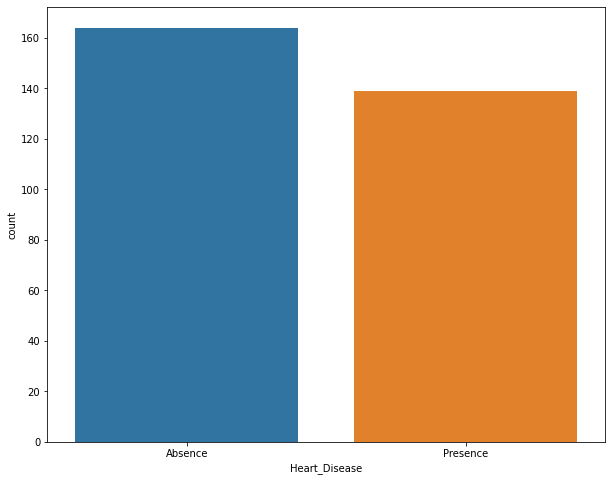

In [16]:
plt.figure(figsize=(10,8))
sns.countplot(x = 'Heart_Disease',data = df)

<AxesSubplot:xlabel='Heart_Disease', ylabel='count'>

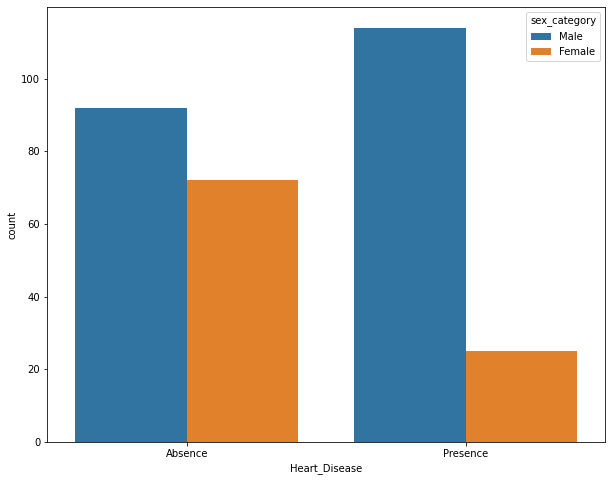

In [17]:
plt.figure(figsize=(10,8))
sns.countplot(x = 'Heart_Disease',data = df,hue = 'sex_category')

<AxesSubplot:xlabel='Heart_Disease', ylabel='count'>

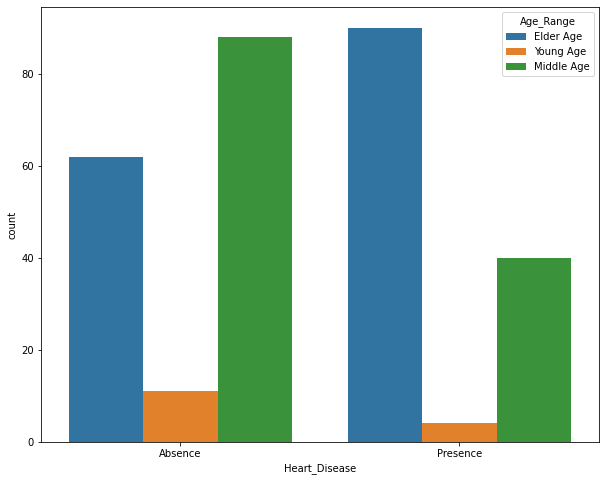

In [18]:
plt.figure(figsize=(10,8))
sns.countplot(x='Heart_Disease',data = df,hue = 'Age_Range')

In [19]:
!pip install pandas-profiling

In [20]:
from pandas_profiling import ProfileReport
prof = ProfileReport(df)

In [21]:
prof

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [22]:
prof.to_file(output_file='output.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

#  Data Transformation

In [23]:
# We calculate the median and mode of ca and thal columns to be replaced in place of -100000.
# From below calculation, we come to know that median and mode for both 'ca' and 'thal' are 0.0 and 3.0
# So we will replace the -100000 with 0.0 in 'ca' and 3.0 in 'thal'

In [24]:
df.median()

age          56.0
cp            3.0
trestbps    130.0
chol        241.0
fbs           0.0
restecg       1.0
thalach     153.0
exang         0.0
oldpeak       0.8
slope         2.0
ca            0.0
thal          3.0
dtype: float64

In [25]:
# replacing 0 in 'ca' where value = -100000

ca_median = int(df['ca'].median())
df.loc[df.ca == -100000, 'ca'] = ca_median

In [26]:
df['ca']

0      0
1      3
2      2
3      0
4      0
      ..
298    0
299    2
300    1
301    1
302    0
Name: ca, Length: 303, dtype: int64

In [27]:
# Replacing 3 in 'thal' where value = -100000

thal_median = int(df['thal'].median())
df.loc[df.thal == -100000, 'thal'] = thal_median

In [28]:
df['thal']

0      6
1      3
2      7
3      3
4      3
      ..
298    7
299    7
300    7
301    3
302    3
Name: thal, Length: 303, dtype: int64

In [29]:
df['thal'].value_counts()

3    168
7    117
6     18
Name: thal, dtype: int64

In [30]:
#Checking Data Types

In [31]:
df.dtypes

age                int64
cp                 int64
trestbps           int64
chol               int64
fbs                int64
restecg            int64
thalach            int64
exang              int64
oldpeak          float64
slope              int64
ca                 int64
thal               int64
Heart_Disease     object
sex_category      object
Age_Range         object
dtype: object

In [32]:
# Converting the numeric columns to categorical 

df = df.astype({"cp":'category',
                                "fbs":'category',
                                "restecg":'category', 
                                "exang":'category',
                                "slope":'category',
                                "ca":'category', 
                                "thal":'category'})

In [33]:
df.dtypes

age                 int64
cp               category
trestbps            int64
chol                int64
fbs              category
restecg          category
thalach             int64
exang            category
oldpeak           float64
slope            category
ca               category
thal             category
Heart_Disease      object
sex_category       object
Age_Range          object
dtype: object

In [34]:
df

age cp  trestbps  chol fbs restecg  thalach exang  oldpeak slope ca thal  \
0     63  1       145   233   1       2      150     0      2.3     3  0    6   
1     67  4       160   286   0       2      108     1      1.5     2  3    3   
2     67  4       120   229   0       2      129     1      2.6     2  2    7   
3     37  3       130   250   0       0      187     0      3.5     3  0    3   
4     41  2       130   204   0       2      172     0      1.4     1  0    3   
..   ... ..       ...   ...  ..     ...      ...   ...      ...   ... ..  ...   
298   45  1       110   264   0       0      132     0      1.2     2  0    7   
299   68  4       144   193   1       0      141     0      3.4     2  2    7   
300   57  4       130   131   0       0      115     1      1.2     2  1    7   
301   57  2       130   236   0       2      174     0      0.0     2  1    3   
302   38  3       138   175   0       0      173     0      0.0     1  0    3   

    Heart_Disease sex_category   Age_Range  
0         Absence         Male   Elder Age  
1        Presence         Male   Elder Age  
2        Presence         Male   Elder Age  
3         Absence         Male   Young Age  
4         Absence       Female  Middle Age  
..            ...          ...         ...  
298      Presence         Male  Middle Age  
299      Presence         Male   Elder Age  
300      Presence         Male   Elder Age  
301      Presence       Female   Elder Age  
302       Absence         Male   Young Age  

[303 rows x 15 columns]

In [35]:
df.describe()

age    trestbps        chol     thalach     oldpeak
count  303.000000  303.000000  303.000000  303.000000  303.000000
mean    54.438944  131.689769  246.693069  149.607261    1.039604
std      9.038662   17.599748   51.776918   22.875003    1.161075
min     29.000000   94.000000  126.000000   71.000000    0.000000
25%     48.000000  120.000000  211.000000  133.500000    0.000000
50%     56.000000  130.000000  241.000000  153.000000    0.800000
75%     61.000000  140.000000  275.000000  166.000000    1.600000
max     77.000000  200.000000  564.000000  202.000000    6.200000

In [36]:
# Boxplot before outlier treatment for proper visualization of the outliers and how far are they from mean 

{'whiskers': [<matplotlib.lines.Line2D at 0x20e36d22370>,
 'caps': [<matplotlib.lines.Line2D at 0x20e36f42640>,
 'boxes': [<matplotlib.lines.Line2D at 0x20e36d22b80>],
 'medians': [<matplotlib.lines.Line2D at 0x20e36d4fb20>],
 'fliers': [<matplotlib.lines.Line2D at 0x20e36d4f790>],
 'means': []}

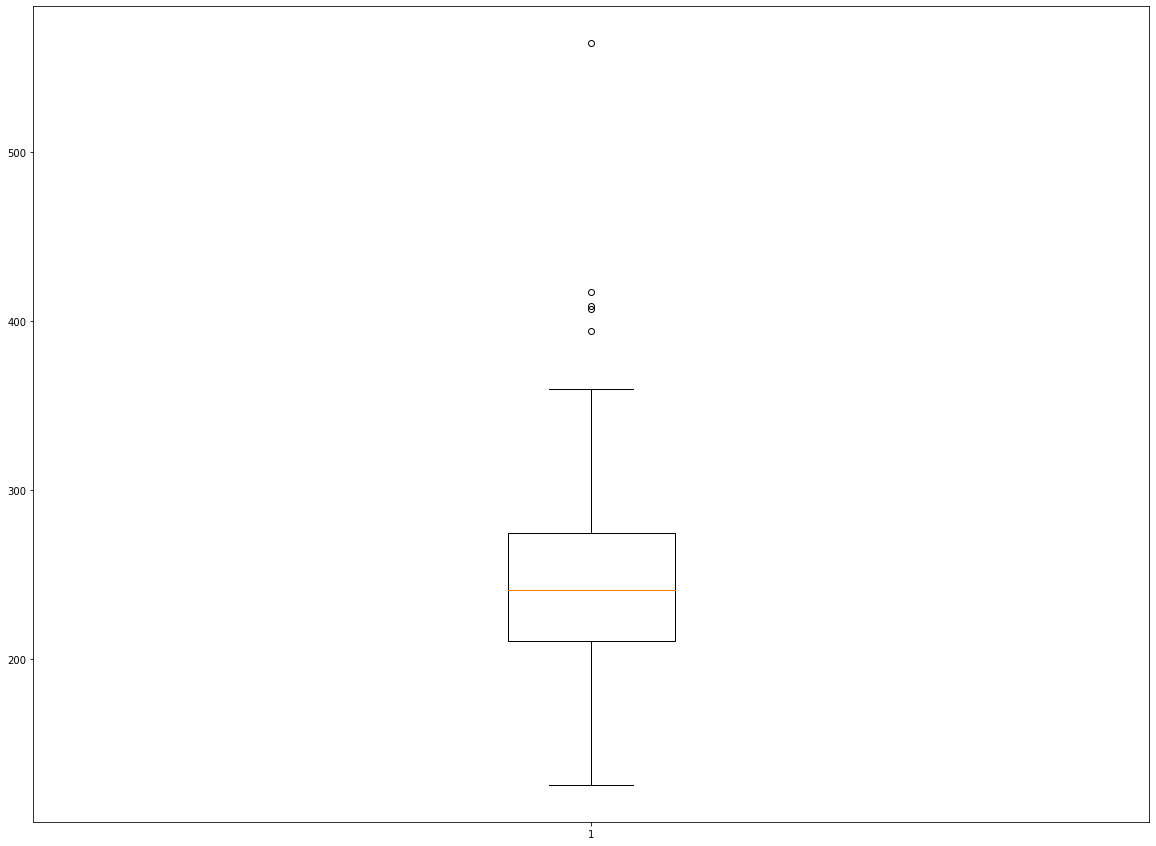

In [37]:
plt.subplots(figsize=(20,15))
plt.boxplot(data=df, x='chol')

In [38]:
df['chol'].mean()

246.69306930693068

In [39]:
#Detecting Outliers using Inter Quartile Range
#Finding The data located in First Quartile and Third Quartile
#If the data point significantly differs from other cluster of data points then removing the data point

In [40]:
outliers_chol = []
def Find_Outliers(data):
    data = sorted(data)
    Q1 = np.percentile(data,25)
    Q3 = np.percentile(data,75)
 
    IQR = Q3-Q1
    l_bound = Q1-(1.5*IQR)
    u_bound = Q3+(1.5*IQR)
   
    for j in data: 
        if (j < l_bound or j > u_bound):
            outliers_chol.append(j)
    return outliers_chol

outliers_chol = Find_Outliers(df['chol'])
print("Outliers from IQR method for chol column: ", outliers_chol)

Outliers from IQR method for chol column:  [394, 407, 409, 417, 564]


In [41]:
#Replacing the outliers in the chol column with the mean

In [42]:
for i in outliers_chol:
    df['chol'] = np.where(df['chol'] == i, df['chol'].mean(), df['chol'])

In [43]:
df

age cp  trestbps   chol fbs restecg  thalach exang  oldpeak slope ca  \
0     63  1       145  233.0   1       2      150     0      2.3     3  0   
1     67  4       160  286.0   0       2      108     1      1.5     2  3   
2     67  4       120  229.0   0       2      129     1      2.6     2  2   
3     37  3       130  250.0   0       0      187     0      3.5     3  0   
4     41  2       130  204.0   0       2      172     0      1.4     1  0   
..   ... ..       ...    ...  ..     ...      ...   ...      ...   ... ..   
298   45  1       110  264.0   0       0      132     0      1.2     2  0   
299   68  4       144  193.0   1       0      141     0      3.4     2  2   
300   57  4       130  131.0   0       0      115     1      1.2     2  1   
301   57  2       130  236.0   0       2      174     0      0.0     2  1   
302   38  3       138  175.0   0       0      173     0      0.0     1  0   

    thal Heart_Disease sex_category   Age_Range  
0      6       Absence         Male   Elder Age  
1      3      Presence         Male   Elder Age  
2      7      Presence         Male   Elder Age  
3      3       Absence         Male   Young Age  
4      3       Absence       Female  Middle Age  
..   ...           ...          ...         ...  
298    7      Presence         Male  Middle Age  
299    7      Presence         Male   Elder Age  
300    7      Presence         Male   Elder Age  
301    3      Presence       Female   Elder Age  
302    3       Absence         Male   Young Age  

[303 rows x 15 columns]

{'whiskers': [<matplotlib.lines.Line2D at 0x20e365d3370>,
 'caps': [<matplotlib.lines.Line2D at 0x20e365d3f40>,
 'boxes': [<matplotlib.lines.Line2D at 0x20e365d3070>],
 'medians': [<matplotlib.lines.Line2D at 0x20e351268e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x20e35126b20>],
 'means': []}

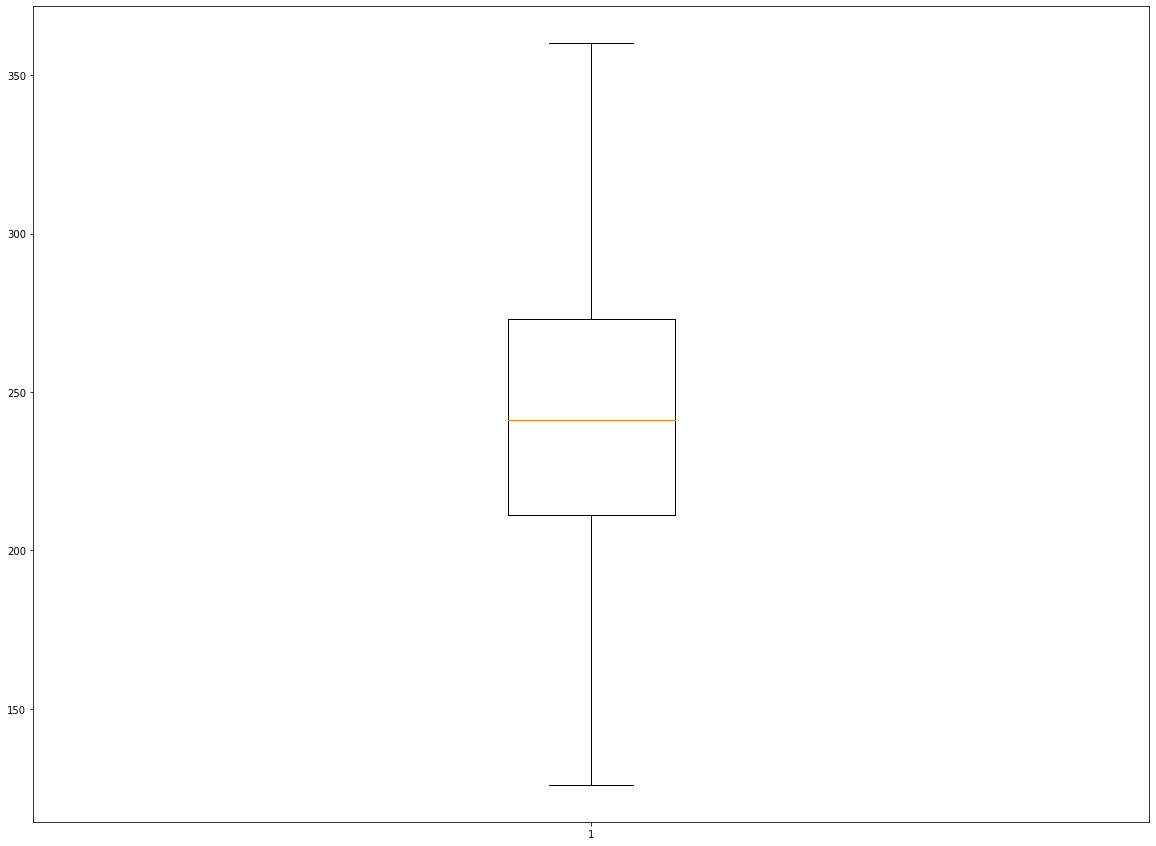

In [44]:
# Boxplot after removing outlier 

plt.subplots(figsize=(20,15))
plt.boxplot(data=df, x='chol')

In [45]:
# Replacing zeros with mean in 'oldpeak' column

In [46]:
df['oldpeak']

0      2.3
1      1.5
2      2.6
3      3.5
4      1.4
      ... 
298    1.2
299    3.4
300    1.2
301    0.0
302    0.0
Name: oldpeak, Length: 303, dtype: float64

In [47]:
df['oldpeak'] = np.where(df['oldpeak'] == 0, df['oldpeak'].mean(), df['oldpeak'])

In [48]:
# Checking the oldpeak column after replacing zeros with mean

In [49]:
df['oldpeak']

0      2.300000
1      1.500000
2      2.600000
3      3.500000
4      1.400000
         ...   
298    1.200000
299    3.400000
300    1.200000
301    1.039604
302    1.039604
Name: oldpeak, Length: 303, dtype: float64

In [50]:
#checking if there are any remaining null values

In [51]:
df['oldpeak'].isna().count()

# now we can see there are no zero value in oldpeak column

303

In [52]:
# If we observe the oldpeak distribution it is skewed
# So we perform Log transformation to remove skewness from 'oldpeak' column

In [53]:
oldpeak_log = np.log(df['oldpeak'])
oldpeak_log

0      0.832909
1      0.405465
2      0.955511
3      1.252763
4      0.336472
         ...   
298    0.182322
299    1.223775
300    0.182322
301    0.038840
302    0.038840
Name: oldpeak, Length: 303, dtype: float64

# Viewing  the cleaned data set

In [54]:
df

age cp  trestbps   chol fbs restecg  thalach exang   oldpeak slope ca  \
0     63  1       145  233.0   1       2      150     0  2.300000     3  0   
1     67  4       160  286.0   0       2      108     1  1.500000     2  3   
2     67  4       120  229.0   0       2      129     1  2.600000     2  2   
3     37  3       130  250.0   0       0      187     0  3.500000     3  0   
4     41  2       130  204.0   0       2      172     0  1.400000     1  0   
..   ... ..       ...    ...  ..     ...      ...   ...       ...   ... ..   
298   45  1       110  264.0   0       0      132     0  1.200000     2  0   
299   68  4       144  193.0   1       0      141     0  3.400000     2  2   
300   57  4       130  131.0   0       0      115     1  1.200000     2  1   
301   57  2       130  236.0   0       2      174     0  1.039604     2  1   
302   38  3       138  175.0   0       0      173     0  1.039604     1  0   

    thal Heart_Disease sex_category   Age_Range  
0      6       Absence         Male   Elder Age  
1      3      Presence         Male   Elder Age  
2      7      Presence         Male   Elder Age  
3      3       Absence         Male   Young Age  
4      3       Absence       Female  Middle Age  
..   ...           ...          ...         ...  
298    7      Presence         Male  Middle Age  
299    7      Presence         Male   Elder Age  
300    7      Presence         Male   Elder Age  
301    3      Presence       Female   Elder Age  
302    3       Absence         Male   Young Age  

[303 rows x 15 columns]

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   age            303 non-null    int64   
 1   cp             303 non-null    category
 2   trestbps       303 non-null    int64   
 3   chol           303 non-null    float64 
 4   fbs            303 non-null    category
 5   restecg        303 non-null    category
 6   thalach        303 non-null    int64   
 7   exang          303 non-null    category
 8   oldpeak        303 non-null    float64 
 9   slope          303 non-null    category
 10  ca             303 non-null    category
 11  thal           303 non-null    category
 12  Heart_Disease  303 non-null    object  
 13  sex_category   303 non-null    object  
 14  Age_Range      295 non-null    object  
dtypes: category(7), float64(2), int64(3), object(3)
memory usage: 22.2+ KB


In [56]:
df.describe()

age    trestbps        chol     thalach     oldpeak
count  303.000000  303.000000  303.000000  303.000000  303.000000
mean    54.438944  131.689769  243.515787  149.607261    1.379277
std      9.038662   17.599748   44.689381   22.875003    0.937039
min     29.000000   94.000000  126.000000   71.000000    0.100000
25%     48.000000  120.000000  211.000000  133.500000    1.000000
50%     56.000000  130.000000  241.000000  153.000000    1.039604
75%     61.000000  140.000000  273.000000  166.000000    1.600000
max     77.000000  200.000000  360.000000  202.000000    6.200000

# EDA after cleaning the data

In [57]:
prof=ProfileReport(df)

In [58]:
prof

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [59]:
prof.to_file(output_file='output_after_cleaningup.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Exporting the Preprocessed dataset into a csv file for further analysis

In [60]:
df.to_csv('Data/heart_disease_dataset_preprocessed.csv',index = False)

In [61]:
df

age cp  trestbps   chol fbs restecg  thalach exang   oldpeak slope ca  \
0     63  1       145  233.0   1       2      150     0  2.300000     3  0   
1     67  4       160  286.0   0       2      108     1  1.500000     2  3   
2     67  4       120  229.0   0       2      129     1  2.600000     2  2   
3     37  3       130  250.0   0       0      187     0  3.500000     3  0   
4     41  2       130  204.0   0       2      172     0  1.400000     1  0   
..   ... ..       ...    ...  ..     ...      ...   ...       ...   ... ..   
298   45  1       110  264.0   0       0      132     0  1.200000     2  0   
299   68  4       144  193.0   1       0      141     0  3.400000     2  2   
300   57  4       130  131.0   0       0      115     1  1.200000     2  1   
301   57  2       130  236.0   0       2      174     0  1.039604     2  1   
302   38  3       138  175.0   0       0      173     0  1.039604     1  0   

    thal Heart_Disease sex_category   Age_Range  
0      6       Absence         Male   Elder Age  
1      3      Presence         Male   Elder Age  
2      7      Presence         Male   Elder Age  
3      3       Absence         Male   Young Age  
4      3       Absence       Female  Middle Age  
..   ...           ...          ...         ...  
298    7      Presence         Male  Middle Age  
299    7      Presence         Male   Elder Age  
300    7      Presence         Male   Elder Age  
301    3      Presence       Female   Elder Age  
302    3       Absence         Male   Young Age  

[303 rows x 15 columns]